# Explicit conservative schemes
For the article "Conservative finite difference schemes for dynamical systems" by Yu Ying and M. D. Malykh, 2022.

In [4]:
load("fdm.sage")

In [5]:
def mod_erk(problem, N, tableau1, tableau2, integral, root_number=1, field=RR):
    var("mu")
    [f,x,x0,T]=problem.list()
    t0=0
    ans=[[t0]+x0]
    dt=T/N
    @parallel
    def step(tableau):
        a=tableau.a(field=field)
        b=tableau.b(field=field)
        c=tableau.c(field=field)
        k=[problem.subs(f,[t0+c[0]*dt]+x0, field=field)]
        for m in range(1,tableau.number_of_stages()):
            L=[t0+c[m]*dt] + [x0_ + sum([a_*k__ for [a_,k__] in zip(a[m],k_)])*dt for [x0_,k_] in zip(x0,zip(*k))]
            k.append(problem.subs(f, L, field=field))
        x1=[x0_ + sum([b_*k__ for [b_,k__]  in zip(b,k_)])*dt for [x0_,k_] in zip(x0,zip(*k))]
        return x1
    mul=[]
    for n in range(N):
        L=list(step([tableau1,tableau2]))
        x1=L[0][1]
        x2=L[1][1]
        i0=integral.subs([i==j for [i,j] in zip(x,x0)])
        i1=integral.subs([i==j+mu*k for [i,j,k] in zip(x,x1,x2)])
        mur=field[mu](i1-i0).roots()[root_number][0]
##        print(mur)
        x0=[i+j*mur for [i,j] in zip(x1,x2)]
        t0=t0+dt
        ans.append([t0]+x0)
        mul.append([t0,mur])
    line(mul, axes_labels=['$t$','$\\mu$']).save('plot.pdf')
    return Numsol(ans,[t]+x,dt,tableau1.order(),problem)

## First test problem
### Problem statement

In [3]:
var("t,x,y")
pr=Initial_problem([x,y],[y,-x],[0,1],10)

In [4]:
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = -x , \\ &
x (0)= 0 , \quad y (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = -x , \\ &
x (0)= 0 , \quad y (0)= 1
\end{aligned} \right. $$

### Butcher tableaus

In [6]:
a10=1
b1 = 1/2/a10
b0=1-b1
B1=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [6]:
B1.latex(field=QQbar)

\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [7]:
a10=2
b1 = 1/2/a10
b0=1-b1
B2=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [8]:
B2.latex(field=QQbar)

\begin{array}{c|cc}
 &  & \\
2 & 2 & \\
\hline
 & \frac{3}{4} & \frac{1}{4}
\end{array}


$$\begin{array}{c|cc}
 &  & \\
2 & 2 & \\
\hline
 & \frac{3}{4} & \frac{1}{4}
\end{array}$$

### Solving the problem

In [9]:
S=erk(pr,N=100, tableau=B2)

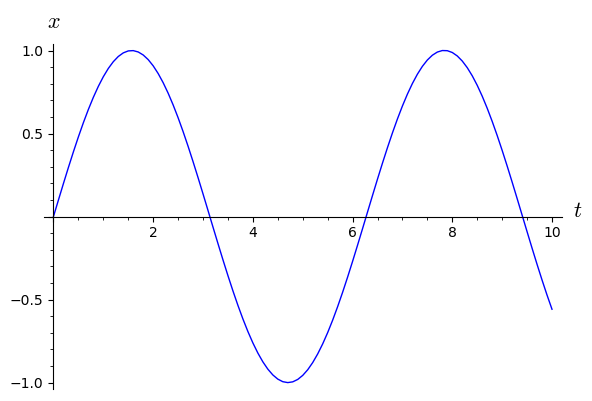

In [10]:
S.plot(t,x)

In [17]:
S2=mod_erk(pr,200, B1, B2, x^2+y^2)

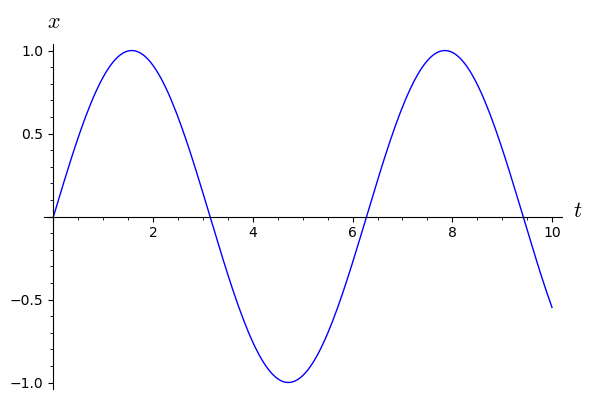

In [18]:
S2.plot(t,x)

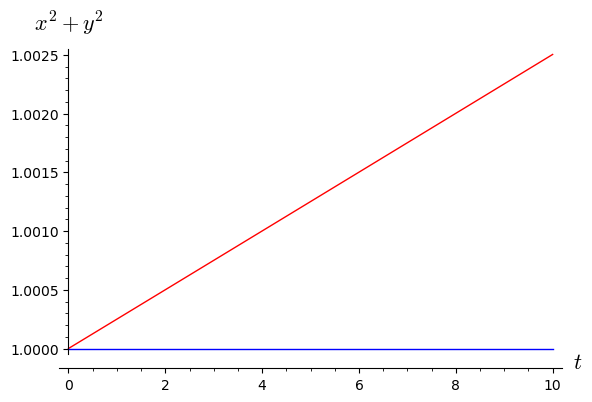

In [19]:
S2.plot(t,x^2+y^2)+S.plot(t,x^2+y^2, color="red")

In [21]:
(S2.plot(t,x^2+y^2)+S.plot(t,x^2+y^2, linestyle="--")).save("plot-1.pdf")

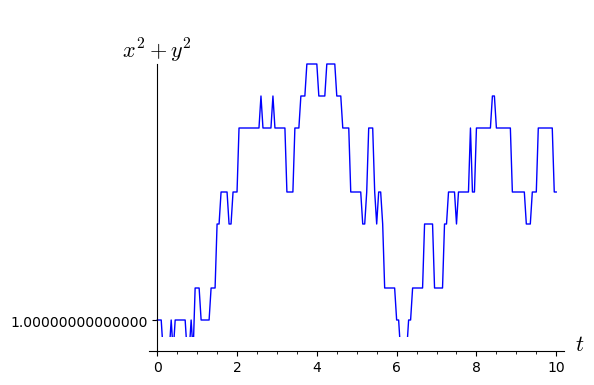

In [20]:
S2.plot(t,x^2+y^2)

Conclusion: the invariant $x^2+y^2$ is conserved.

### Richardson plot

In [24]:
L=[mod_erk(pr,10*2^n, B1, B2, x^2+y^2) for n in range(10)]

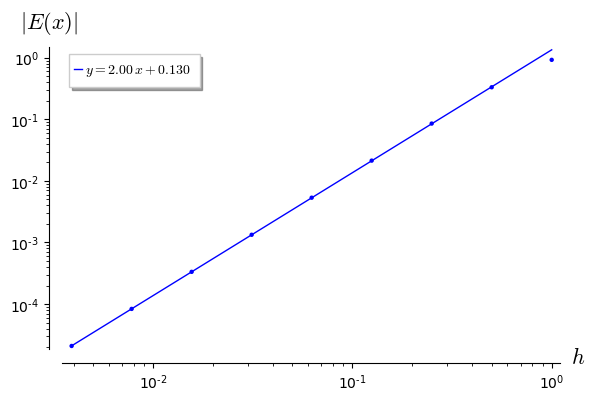

In [25]:
richardson_plot(L,x,9, nmin=1)

In [29]:
richardson_plot(L,x,9, nmin=1).save("plot-2.pdf")

Conclusion: order of the scheme is equal to 2.

## Second test problem
### Problem statement

In [8]:
var("p,q,r,t")
k=1/2
pr2=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

### Solving the problem

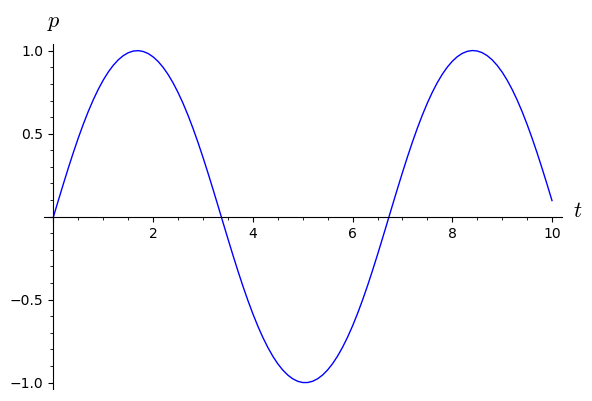

In [9]:
S=erk(pr2,N=100, tableau=B2)
S.plot(t,p)

In [10]:
S2=mod_erk(pr2,100, B1, B2, p^2+q^2)

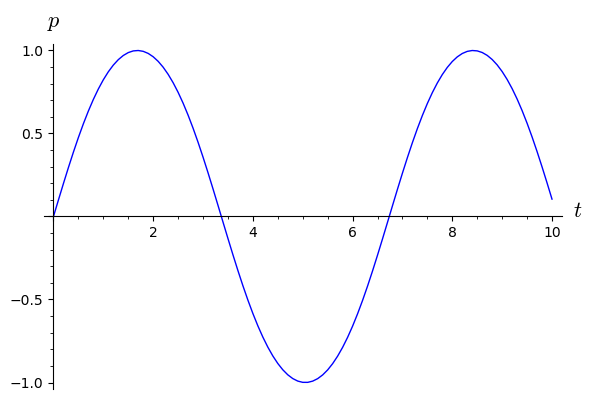

In [11]:
S2.plot(t,p)

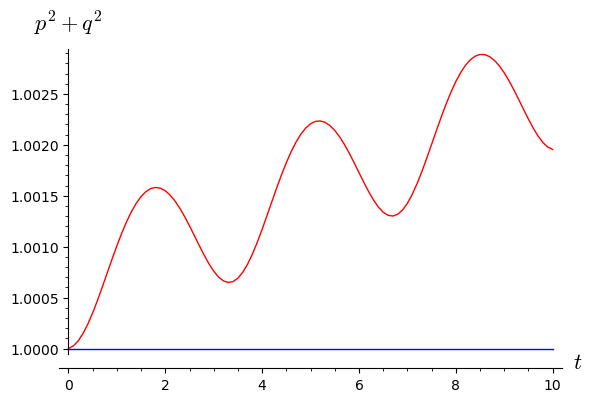

In [31]:
S2.plot(t,p^2+q^2)+S.plot(t,p^2+q^2, color="red")

In [32]:
(S2.plot(t,p^2+q^2)+S.plot(t,p^2+q^2, linestyle="--")).save("plot-3.pdf")

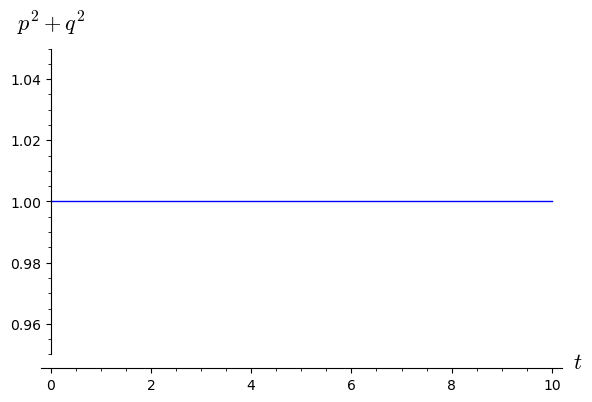

In [33]:
S2.plot(t,p^2+q^2)

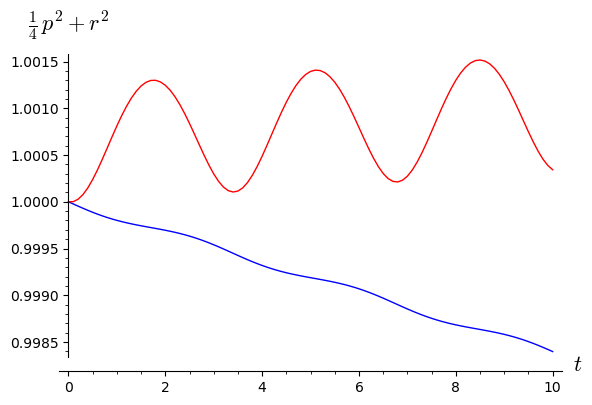

In [34]:
S2.plot(t,k^2*p^2+r^2)+S.plot(t,k^2*p^2+r^2, color="red")

In [35]:
(S2.plot(t,k^2*p^2+r^2)+S.plot(t,k^2*p^2+r^2, linestyle="--")).save("plot-4.pdf")

Conclusion: the invariant $p^2+q^2$ is conserved, the second invariant $k^2 p^2 +r^2$ is not. 

### Richardson plot

In [36]:
L=[mod_erk(pr2,10*2^n, B1, B2, p^2+q^2) for n in range(10)]

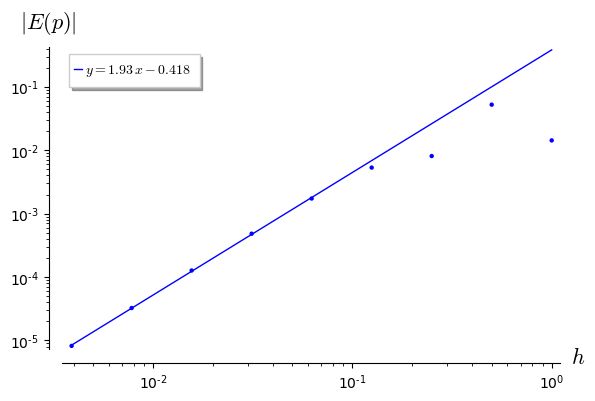

In [37]:
richardson_plot(L,p,9, nmin=4)

Conclusion: order of the scheme is equal to 2.

In [38]:
richardson_plot(L,p,9, nmin=4).save("plot-5.pdf")